In [1]:
import numpy as np
import pandas as pd

### Reading the Dataset

In [2]:
mydata = pd.read_csv("19880101_20191231.csv", index_col='Date')
mydata

,Open,High,Low,Close,Volume
Date,,,,,
1988-01-04,1950.80,2030.00,1950.80,2015.30,20877900
1988-01-05,2021.40,2075.30,2021.40,2031.50,27195361
1988-01-06,2031.50,2058.20,2012.80,2037.80,18790681
1988-01-07,2037.80,2061.50,2004.60,2051.90,21377283
1988-01-08,2051.90,2058.70,1898.00,1911.30,27445517
...,...,...,...,...,...
2019-12-24,28572.57,28576.80,28503.21,28515.45,86151979
2019-12-26,28539.46,28624.10,28535.15,28621.39,156025977
2019-12-27,28675.34,28701.66,28608.98,28645.26,182181663


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8064 entries, 1988-01-04 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    8064 non-null   float64
 1   High    8064 non-null   float64
 2   Low     8064 non-null   float64
 3   Close   8064 non-null   float64
 4   Volume  8064 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 378.0+ KB


### Feature Generation and extraction

In [4]:
def add_original_feature(df, df_new):
    df_new['open'] = df['Open']
    df_new['open_1'] = df['Open'].shift(1)
    df_new['close 1'] = df['Close'].shift(1)
    df_new['high_1'] = df['High'].shift(1)
    df_new['low 1'] = df['Low'].shift(1)
    df_new['volume 1'] = df['Volume'].shift(1)

In [5]:
def add_avg_price(df, df_new):
    df_new['avg_price_5'] =df['Close'].rolling(5).mean().shift (1)
    df_new['avg_price_30']=df['Close'].rolling(21).mean().shift (1)
    df_new['avg_price_365']=df['Close'].rolling(252).mean().shift (1)
    df_new['ratio_avg_price_5_30']=df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365']=df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365']=df_new['avg_price_30'] / df_new['avg_price_365']

In [6]:
def add_avg_volume (df, df_new):
    df_new['avg_volume_5']=df['Volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30']=df['Volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365']=df['Volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30']=df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] =df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365']=df_new['avg_volume_30'] / df_new['avg_volume_365']

In [7]:
def add_std_price(df, df_new):
    df_new['std_price_5']=df['Close'].rolling(5).std().shift(1)
    df_new['std_price_30']=df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365']=df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] =df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] =df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_365'] =df_new['std_price_30'] / df_new['std_price_365']

In [8]:
def add_std_volume (df, df_new):
    df_new['std_volume_5']=df['Volume'].rolling(5).std().shift (1)
    df_new['std_volume_30']=df['Volume'].rolling(21).std().shift(1)
    df_new['std_volume_365']=df['Volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30']=df_new['std_volume_5'] /df_new['std_volume_30']
    df_new['ratio_std_volume_5_365']=df_new['std_volume_5'] /df_new['std_volume_365']
    df_new['ratio_std_volume_30_365']=df_new['std_volume_30'] /df_new['std_volume_365']

In [9]:
def add_return_feature(df, df_new):
    df_new['return_1']=((df['Close']-df['Close'].shift (1))/ df['Close'].shift(1)).shift(1)
    df_new['return_5']=((df['Close']-df['Close'].shift (5))/df['Close'].shift(5)).shift(1)
    df_new['return_30']=((df['Close' ]-df['Close'].shift (21)) / df['Close'].shift(21)).shift(1)
    df_new['return_365']=((df['Close']-df['Close'].shift (252)) / df['Close'].shift (252)).shift(1)
    df_new['moving_avg_5']=df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30']=df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365']=df_new['return_1'].rolling(252).mean ().shift(1)

In [11]:
def generate_features(df):
    df_new = pd.DataFrame()
# 6 original features
    add_original_feature(df,df_new)
# 31 generated features
    add_avg_price(df, df_new) 
    add_avg_volume (df, df_new) 
    add_std_price(df, df_new) 
    add_std_volume(df, df_new)
    add_return_feature(df, df_new)
# the target
    df_new['close'] = df['Close']
    df_new = df_new.dropna (axis=0)
    return df_new

In [12]:
data = generate_features(mydata)

In [13]:
data

,open,open_1,close 1,high_1,low 1,volume 1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_volume_5_365,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close
Date,,,,,,,,,,,,,,,,,,,,,
1989-01-04,2146.60,2168.40,2144.60,2168.40,2127.10,17302883.0,2165.000,2150.623810,2062.113095,1.006685,...,0.562543,0.722978,-0.011067,-0.011204,0.020315,0.055673,0.000770,0.001222,0.000354,2177.70
1989-01-05,2177.70,2146.60,2177.70,2183.40,2146.60,15714720.0,2168.000,2154.690476,2062.668254,1.006177,...,0.473516,0.723715,0.015434,0.006936,0.040816,0.068652,-0.002230,0.000979,0.000278,2190.50
1989-01-06,2190.50,2177.70,2190.50,2205.20,2173.00,20303094.0,2172.820,2157.866667,2063.218254,1.006930,...,0.579903,0.747630,0.005878,0.011124,0.031406,0.067547,0.001428,0.001931,0.000327,2194.30
1989-01-09,2194.30,2190.50,2194.30,2213.80,2182.30,16494441.0,2175.140,2160.004762,2064.341270,1.007007,...,0.515648,0.745619,0.001735,0.005315,0.020890,0.148067,0.002262,0.001494,0.000323,2199.50
1989-01-10,2199.50,2194.30,2199.50,2209.10,2185.00,18410324.0,2181.320,2162.190476,2065.350794,1.008847,...,0.278728,0.741686,0.002370,0.014249,0.021313,0.130790,0.001104,0.001003,0.000602,2193.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,28572.57,28491.78,28551.53,28582.49,28491.78,223499234.0,28378.004,28047.791429,26266.161032,1.011773,...,1.116941,0.659776,0.003389,0.011179,0.028280,0.272045,0.002264,0.001087,0.000907,28515.45
2019-12-26,28539.46,28572.57,28515.45,28576.80,28503.21,86151979.0,28427.662,28078.259524,26292.840595,1.012444,...,1.380134,0.708026,-0.001264,0.008784,0.022953,0.308516,0.002228,0.001342,0.000993,28621.39
2019-12-27,28675.34,28539.46,28621.39,28624.10,28535.15,156025977.0,28504.084,28104.684286,26315.630040,1.014211,...,1.451486,0.724027,0.003715,0.013531,0.019772,0.251020,0.001754,0.001094,0.001103,28645.26


### Splitting the Dataset into Train and Test

In [14]:
start_train ='1988-01-01'
end_train='2018-12-31'
start_test = '2019-01-01'
end_test='2019-12-31'

data_train=data.loc[start_train:end_train]
X_train = data_train.drop('close', axis=1).values
y_train = data_train['close'].values
data_test = data.loc[start_test:end_test]
X_test = data_test.drop('close',axis=1).values
y_test = data_test['close'].values

### Scaling the Features

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_Scaled_train = scaler.fit_transform(X_train)
X_Scaled_test= scaler.transform(X_test)

### Training the model

In [18]:
from sklearn.neural_network import MLPRegressor
nn_scikit= MLPRegressor(hidden_layer_sizes=(16,8), 
                        activation='relu', solver='adam',
                        learning_rate_init=0.001, 
                        random_state=42,
                        max_iter=1000)

In [19]:
nn_scikit.fit(X_Scaled_train, y_train)
pred = nn_scikit.predict(X_Scaled_test)
print(pred)

[23313.93059336 23456.20567101 22996.02253138 23549.89644849
 23615.4391356  23802.93747361 23831.62941416 24023.98287761
 24016.03563017 24008.55287215 24161.48525052 24260.61570473
 24386.29243304 24613.16840448 24429.57756284 24614.75442128
 24619.59769667 24777.76057092 24552.52498323 24710.87595766
 24995.62636226 24933.86771189 25040.45233017 25185.44229051
 25374.63612764 25312.78026372 25188.92805489 25137.03264666
 25126.18332448 25433.08302524 25513.52357349 25434.27036684
 25785.68252468 25847.09802496 25886.06570101 25825.90948931
 26057.60247224 26111.16957214 26054.1477626  25993.40247515
 25974.92159526 26072.29423288 25874.98401253 25861.54247218
 25760.05865573 25524.72513628 25439.53366973 25602.17190196
 25644.05256137 25745.06270956 25756.92435396 25827.11484782
 25919.75675688 25955.29853882 25800.12466557 25948.32009716
 25619.88006054 25607.93392301 25741.41752271 25720.60377485
 25767.97718662 25976.45852646 26220.88516613 26133.28423066
 26225.07460873 26367.51

### Evaluating the Model

In [20]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, pred)
print("R2_Score",r2)

mae = mean_absolute_error(y_test, pred)
print("mean_absolute_error", mae)

mse = mean_squared_error(y_test, pred)
print("mean_squared_error", mse)

R2_Score 0.9671085579951029
mean_absolute_error 140.6367501510333
mean_squared_error 38177.7363714937


### Plotting the results

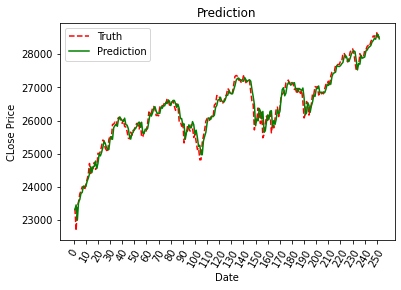

In [21]:
import matplotlib.pyplot as plt
e = [i for i in range (1,len(y_test)+1,1)]
plt.plot(e,y_test,color='red',linestyle='--')
plt.plot(e,pred,color='green',linestyle='-')
plt.xticks(range(0,252,10), rotation=60)
plt.xlabel('Date')
plt.ylabel('CLose Price')
plt.title('Prediction')
plt.legend(['Truth','Prediction'])
plt.show()